In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import cufflinks as cf
#cf.go_offline()


# Goal

Given an unknown dataset. Predict the response **y** using a feature set comprised of the variables **x0 : x49**.

Identify the optimized model and feature set that maximizes accuracy and minimizes cost given the following constraints:

Each False Positive increases cost by `$`10  <br>
Each False Negative inreases cost by `$`500 <br>
True Predictions will not increase cost. <br>


In [451]:
dfFull = pd.read_csv ('./final_project.csv')

# Data

The data set consists 160,000 observations that record the response variable **y** and up to 50 potential predictive variables **x0 : x49**. While it is unknown what the variables represent, it is known that the response variable is binary and in each of the recorded observations it has the value of either 0 or 1. Accross the data set there are 1608 missing values. Therefore, applying listwise deletion to address the missing data would result in a loss of up to 1% of the observations. 

A preliminary review of the dataset indicates that within the predictive variable set, there are a total of 46 numerical variables and 4 categorical variables. The four categorical variables are (**x24, x29, x30, x32**). 

In [450]:
print("Records and Fields: ", dfFull.shape)
print("Total Missing Values: ", dfFull.isnull().sum().sum())

Records and Fields:  (160000, 51)
Total Missing Values:  1608


In [452]:
cat = ["x24","x29","x30","x32"]
print(dfFull[cat].describe())

           x24     x29        x30     x32
count   159972  159970     159970  159969
unique       3      12          5      12
top       asia    July  wednesday   0.01%
freq    138965   45569     101535   40767


A closer review of the categorical variables indicates that variable **x32** is likely a numerical variable that represents a percentage. Subsequently, variable **x32** was then coded as a float type and missing values were checked to ensure that no missing values were inadvertantly imputed or dropped inadvertantly.

In [453]:
dfFull["x32"] = dfFull["x32"].str.rstrip('%')
dfFull["x32"] = dfFull["x32"].apply(pd.to_numeric, errors='coerce').astype('float64')
print("Total Missing Values: ", df.isnull().sum().sum()) 

Total Missing Values:  1608


A review of the categorical variables indicates that variable **x24** might represent a continent or region and that within the variable there are 3 unique values. Variable **x29** seems to represent a calendar month and contains 12 unique values. Lastly, variable **x30** seem to represent a weekday and contains 5 unique values. Missing values whithin each field range from 28 to 30. 

In [454]:
cat = ["x24","x29","x30"]
print(dfFull[cat].head())

      x24   x29        x30
0  euorpe  July    tuesday
1    asia   Aug  wednesday
2    asia  July  wednesday
3    asia  July  wednesday
4    asia  July    tuesday


In [455]:
print("Total Missing Values:") 
print(dfFull[cat].isnull().sum())

Total Missing Values:
x24    28
x29    30
x30    30
dtype: int64


At most, only 88 observations or .05% of the total observations would be lost through listwise deletion of missing categorical values. According to our previous studies along with those of researchers like that of Paul D. Allison of the University of Pennsylvania, listwise deletion of categorical variables can achieve results similar to more complicated imputation methods like that of the Markov Chain Monte Carlo (MCMC) algorithm used in popular imputation processes.  Therefore we decided to delete the observations in which a categorical variable had missing data rather than risk introducing bias through imputation. This decision was heavily influenced by the fact that we did not know if the data was missing at random or if there was an underlying correlation between a value being missing and another variable. 

It was further decided that due to the lack of information regarding the underlying data and the relatively small percentage of missing numerical values, that listwise deletion would be applied to the numerical variables as well. As there were 50 explanatory variables per record we did consider the potential data loss, as even one mising value in a record would result in the deletion of an entire row, still after much deliberation it was decided that atleast for initial modeling, listwise deletion would be utilized prior to the initial exploratory data analysis and that base modeling would be conducted using the reduced dataset. 

In [456]:
df = dfFull.dropna(axis=0)

After the rows with missing values were dropped we were left with a dataset with 158,392 observations and no missing values. 

In [457]:
print("Records and Fields: ", df.shape)
print("Total Missing Values: ", df.isnull().sum().sum())

Records and Fields:  (158392, 51)
Total Missing Values:  0


Because little was known about the variables or their potential interactions and associations, no additional preprocessing was done before moving on to exploratory data analysis.  

# EDA

Although we do not know what the response variable **y** represents, we will refer to value of 1 as a positive response and value of 0 as a negative response for the sake of simplyfying the explanation of our findings and methodology in the exploratory data analysis and going forward.

#### Response Variable

Text(0, 0.5, 'Count')

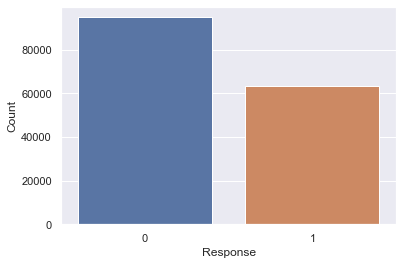

In [458]:
ax = sns.countplot(x = 'y', data = df)
ax.set_xlabel("Response")
ax.set_ylabel("Count")

A review of the response variable indicates that there are are 40.1% positive responses compared to 59.9% negative responses. This means that we might have to consider balancing the classes as we move forward, though initially the class imblance does not seem extreme. 

In [463]:
p1 = len(df[df["y"]==1])/len(df["y"])*100
p0 = len(df[df["y"]==0])/len(df["y"])*100
print( "y = 0 : ",  len(df[df["y"]==0]), ", %.3f"%p0,"%")
print( "y = 1 : ",  len(df[df["y"]==1]), ", %.3f"%p1,"%")
print("Total Missing Values: ", df.isnull().sum().sum())

y = 0 :  94846 , 59.881 %
y = 1 :  63546 , 40.119 %
Total Missing Values:  0


The effect of the listwise deletion on the response variable balance was examined, but we found that dropping the missing values did not significantly affect the ratio of positive to negative responses, so we continued we the reduced set.

In [462]:
p1 = len(dfFull[dfFull["y"]==1])/len(dfFull["y"])*100
p0 = len(dfFull[dfFull["y"]==0])/len(dfFull["y"])*100
print( "y = 0 : ",  len(dfFull[dfFull["y"]==0]), ", %.3f"%p0,"%")
print( "y = 1 : ",  len(dfFull[dfFull["y"]==1]), ", %.3f"%p1,"%")
print("Total Missing Values: ", dfFull.isnull().sum().sum()) 

y = 0 :  95803 , 59.877 %
y = 1 :  64197 , 40.123 %
Total Missing Values:  1608


#### Categorical Variables

The counts and distribution of each of the categorical variables was examined using a combination of violin plots and bar charts to get a sense for the distriburion of occurences among the variables and to determine if any of the categotical variables seem to have a disproportionate effect on the response. Based on the distribution of the response variable as a whole we expected that by class attribute there would be an approximate 60/40 split in favor of negative responses. 

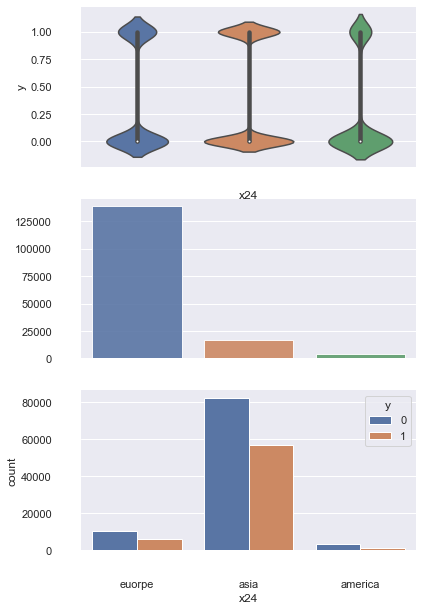

In [301]:
count = df['x24'].value_counts()
f, axes = plt.subplots(3, 1, figsize=(6, 10), sharex=True)
sns.barplot(count.index, count.values, alpha=0.9, ax=axes[1])
sns.violinplot(x='x24', y="y", data=df1, ax=axes[0])
sns.countplot(x = 'x24', data = df, hue = 'y', ax=axes[2])
sns.despine(offset=20, trim=True)

The **x24** variable had three levels. In the violin plots for **x24** we could see a greater occurrence of negative responses compared to that of positive responses. We also saw that the individual observations where not evenly distributed accross the individual levels. We could see that while well over 125,000 overvations had a *euorpe* value, the remaining two levels, *asia* and *america*, combined did not reach 25,000. We did however see the expected distribution of positive and negative responses within the individual levels.    

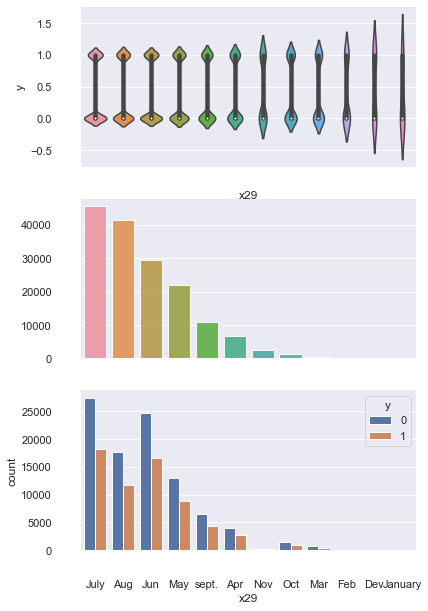

In [302]:
count = df['x29'].value_counts()
f, axes = plt.subplots(3, 1, figsize=(6, 10), sharex=True)
sns.barplot(count.index, count.values, alpha=0.9, ax=axes[1])
sns.violinplot(x="x29", y="y", data=df1, ax=axes[0])
sns.countplot(x = 'x29', data = df, hue = 'y', ax=axes[2])
sns.despine(offset=20, trim=True)

The **x29** variable had 12 levels but 

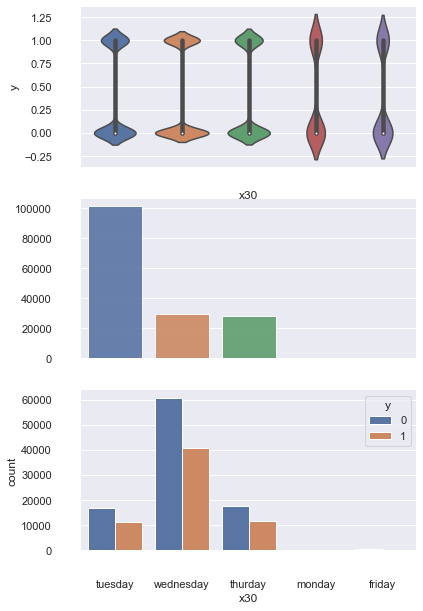

In [303]:
count = df['x30'].value_counts()
f, axes = plt.subplots(3, 1, figsize=(6, 10), sharex=True)
sns.barplot(count.index, count.values, alpha=0.9, ax=axes[1])
sns.violinplot(x="x30", y="y", data=df1, ax=axes[0])
sns.countplot(x = 'x30', data = df, hue = 'y', ax=axes[2])
sns.despine(offset=20, trim=True)

In [ ]:
We saw the same accross the 

In [205]:
print(count)

wednesday    101492
thurday       29421
tuesday       27947
friday          564
monday          488
Name: x30, dtype: int64


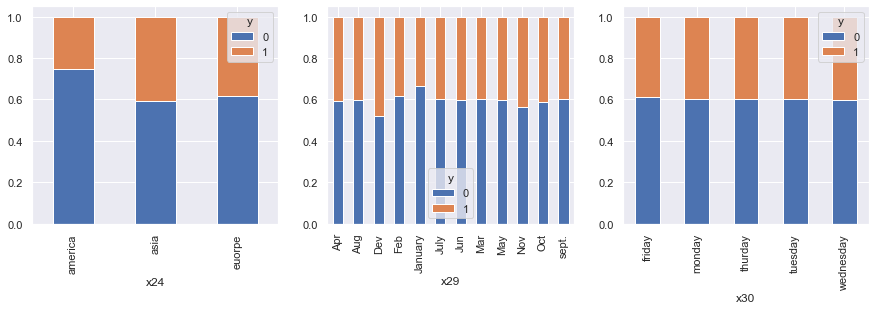

In [314]:
f, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=False)
table1=pd.crosstab(df.x24,df.y)
table2=pd.crosstab(df.x29,df.y)
table3=pd.crosstab(df.x30,df.y)
table1.div(table1.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=axes[0])
table2.div(table2.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=axes[1])
table3.div(table3.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=axes[2])

#### Continous Variables

In [255]:
df_num = df.drop(['x24', 'x29', 'x30'], axis=1)

In [361]:
dfc1 = df_num.iloc[:, np.r_[0:13, 47]]
dfc2 = df_num.iloc[:, np.r_[14:24, 47]]
dfc3 = df_num.iloc[:, np.r_[25:35, 47]]
dfc4 = df_num.iloc[:, np.r_[35:46, 47]]

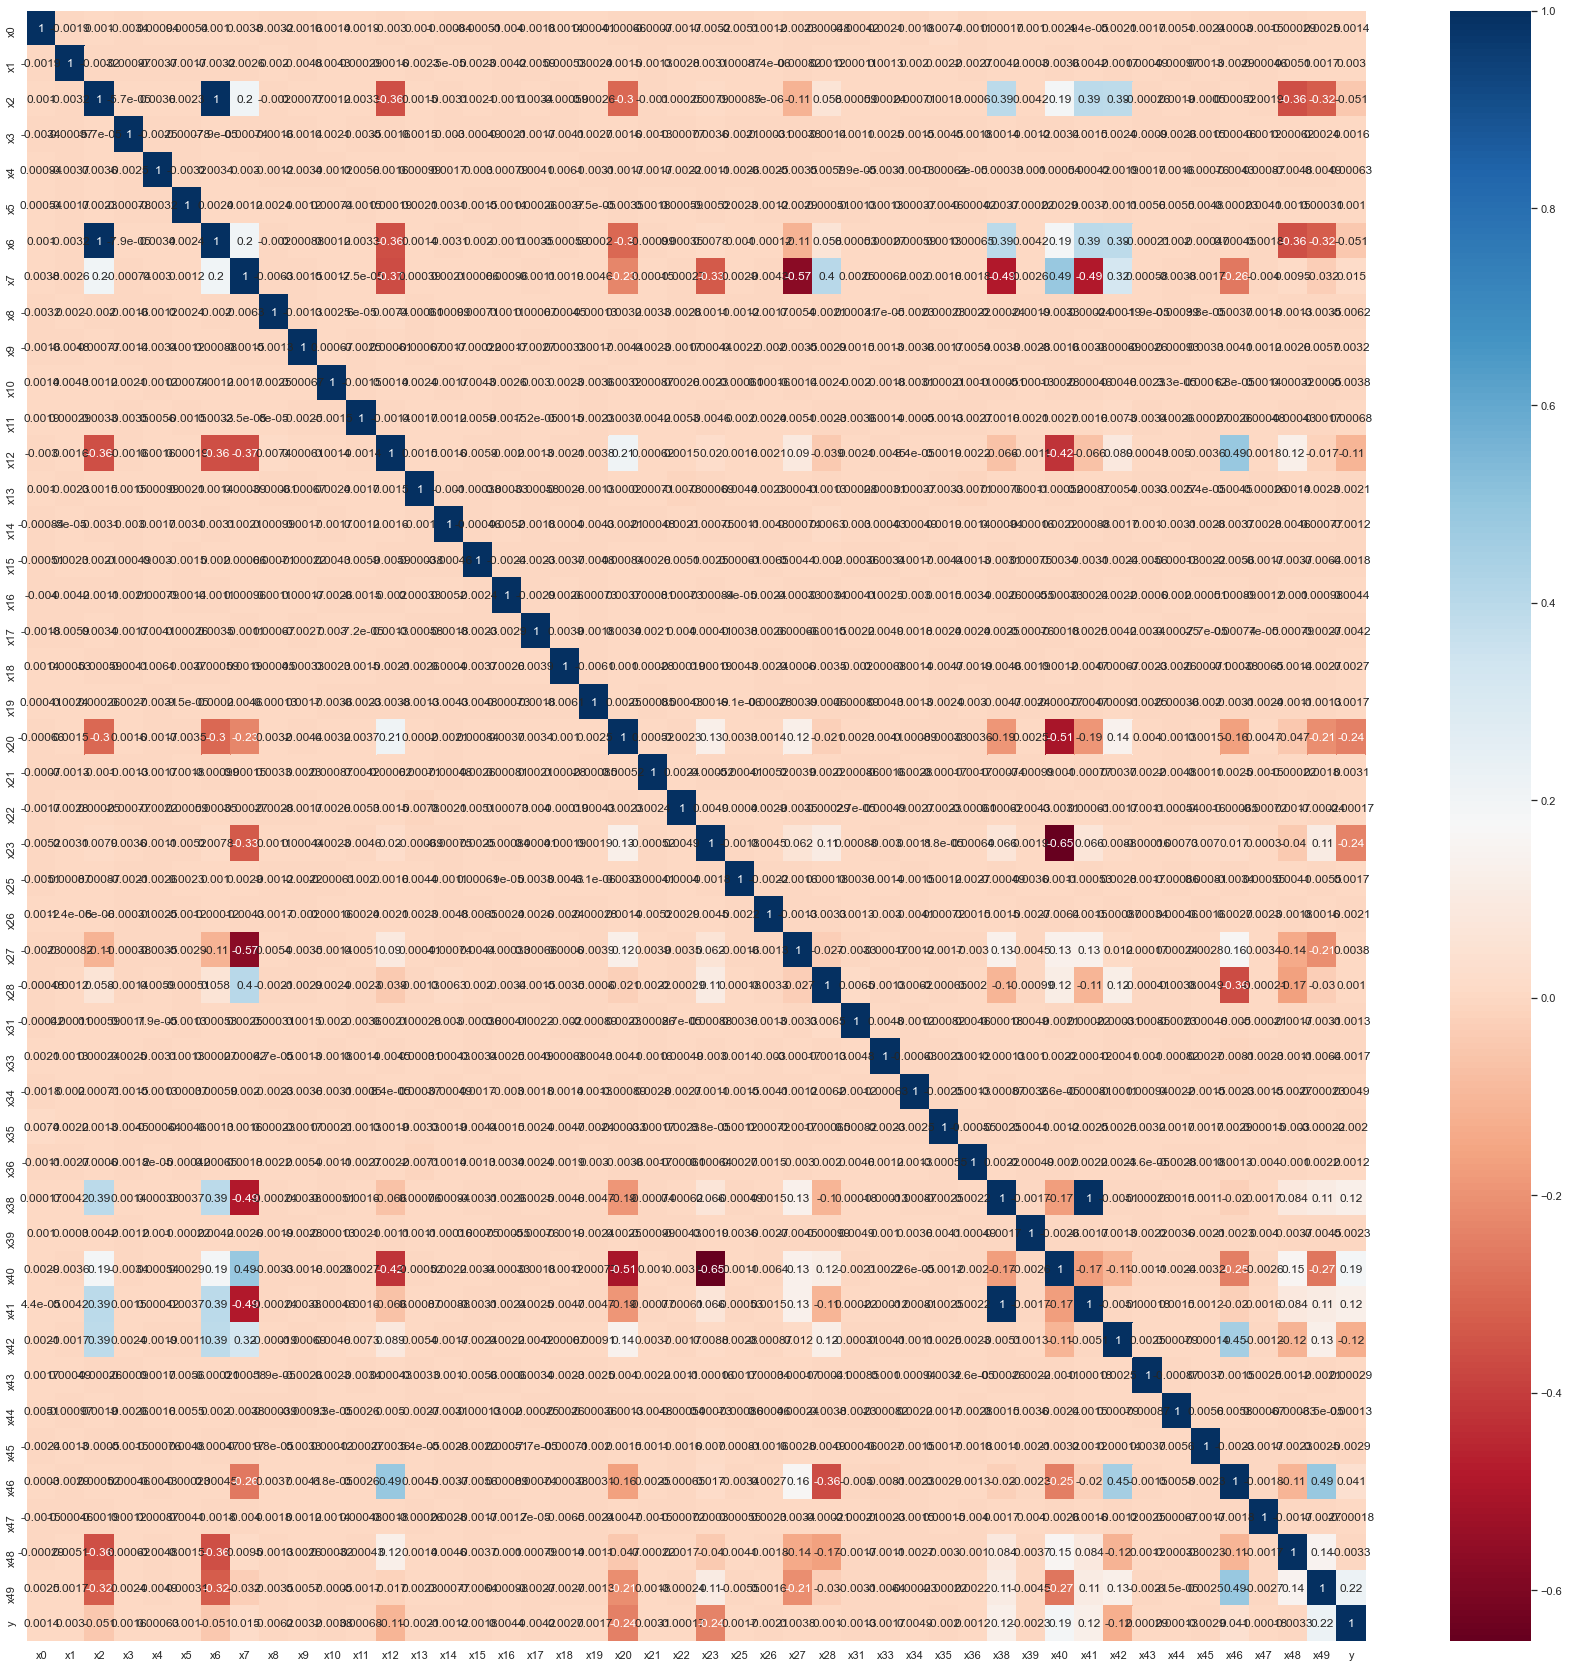

In [360]:
ax, fig = plt.subplots(figsize = (30,30))
sns.heatmap(df_num.corr(), annot=True, cmap = 'RdBu') 

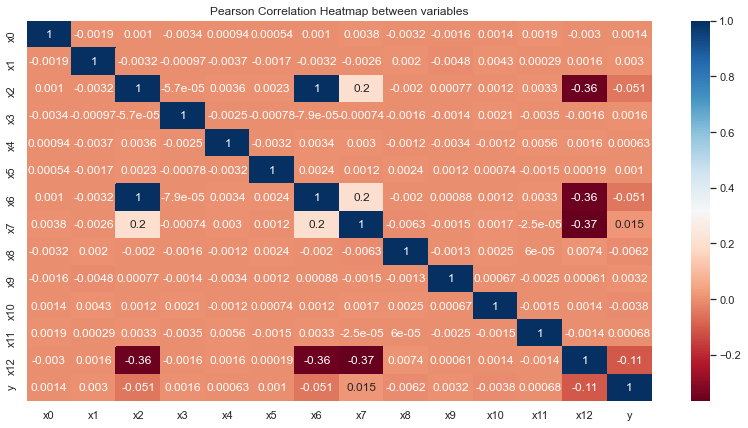

In [358]:
ax, fig = plt.subplots(figsize = (14,7))
sns.set(font_scale=1)
sns.heatmap(dfc1.corr(), annot=True, cmap = 'RdBu') 
plt.title("Pearson Correlation Heatmap between variables")
plt.show()

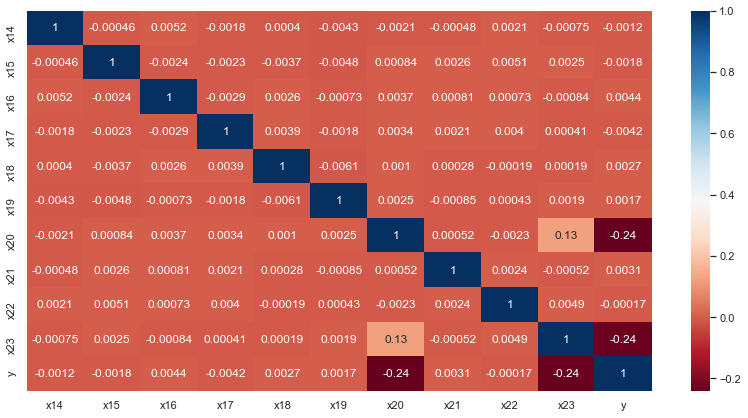

In [353]:
ax, fig = plt.subplots(figsize = (14,7))
sns.heatmap(dfc2.corr(), annot=True, cmap = 'RdBu') 

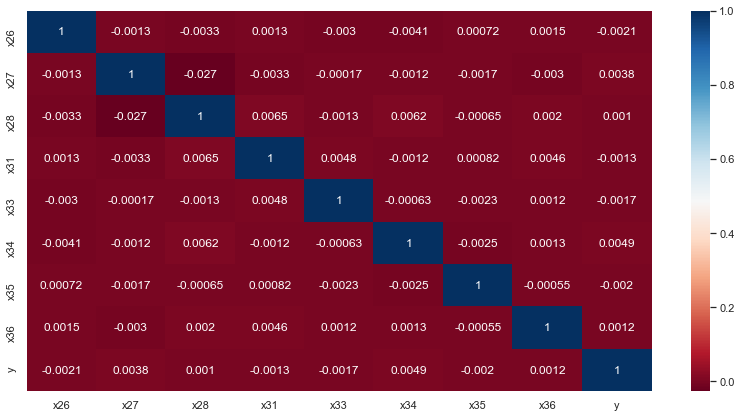

In [354]:
ax, fig = plt.subplots(figsize = (14,7))
sns.heatmap(dfc3.corr(), annot=True, cmap = 'RdBu')

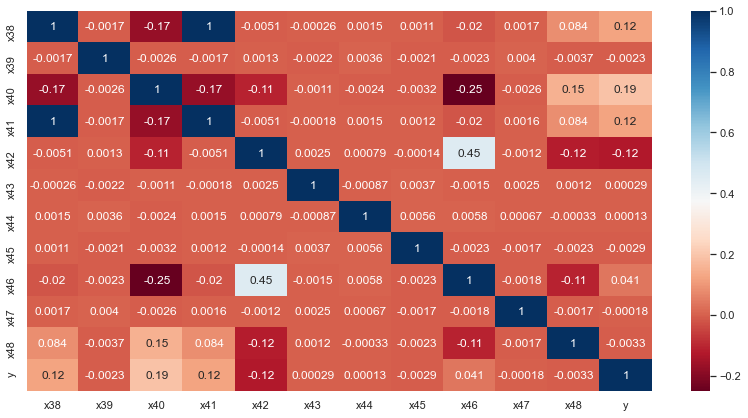

In [362]:
ax, fig = plt.subplots(figsize = (14,7))
sns.heatmap(dfc4.corr(), annot=True, cmap = 'RdBu')

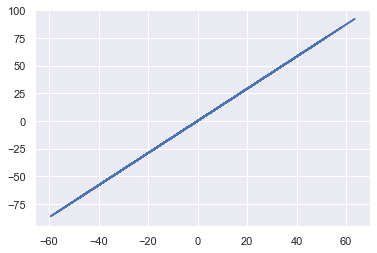

In [365]:
plt.plot(df['x2'], df['x6'])

In [351]:
dfc1[['x2','x6']].describe()

,x2,x6
count,159874.000000,159886.000000
mean,-1.148940,-1.668917
std,13.274082,19.299539
min,-59.394048,-86.354483
25%,-10.165405,-14.778726
50%,-1.340161,-1.947181
75%,7.874129,11.449278
max,63.545653,92.390605


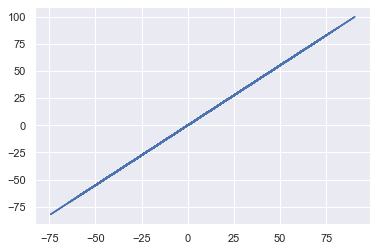

In [366]:
plt.plot(df['x38'], df['x41'])

In [368]:
dfc4[['x38','x41']].describe()

,x38,x41
count,159881.000000,159872.000000
mean,6.060389,6.702469
std,16.892290,18.680956
min,-74.297559,-82.167224
25%,-5.249882,-5.804080
50%,6.186954,6.842820
75%,17.421053,19.266854
max,90.467981,100.050432


In [257]:
df1 = df_num.iloc[:,0:9]
df2 = df_num.iloc[:,10:19]
df3 = df_num.iloc[:,20:29]
df4 = df_num.iloc[:,30:40]
df5 = df_num.iloc[:,41:47]

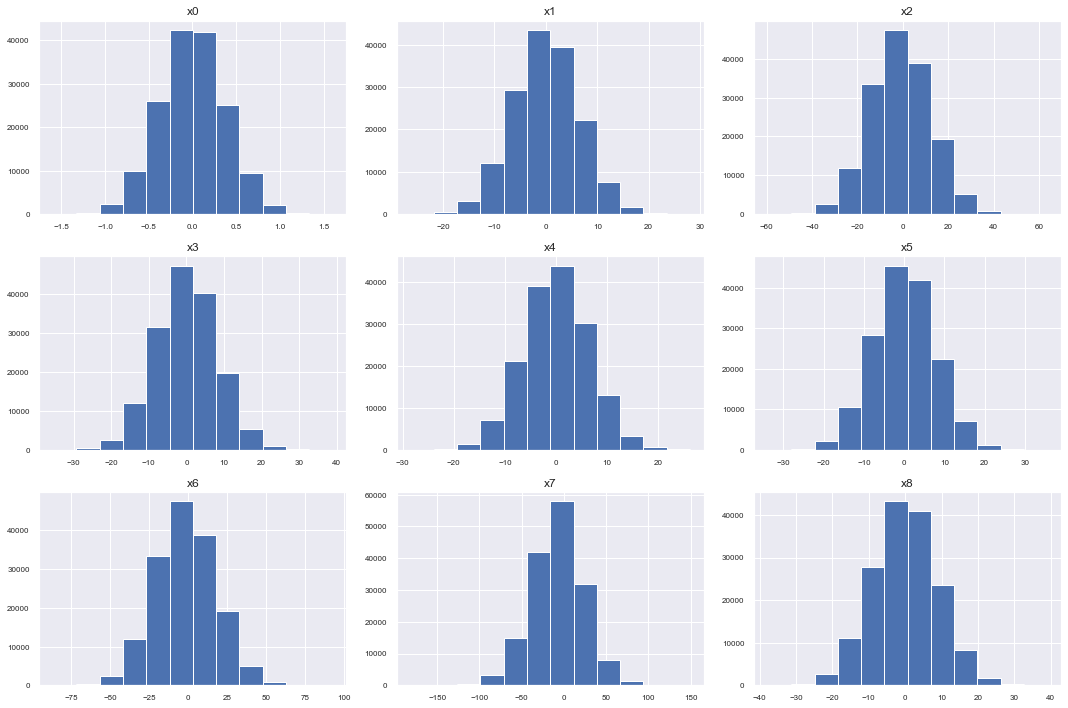

In [269]:
df1.hist(xlabelsize = 8, ylabelsize = 8, bins = 12, figsize = (15, 10))
plt.tight_layout()
plt.show()

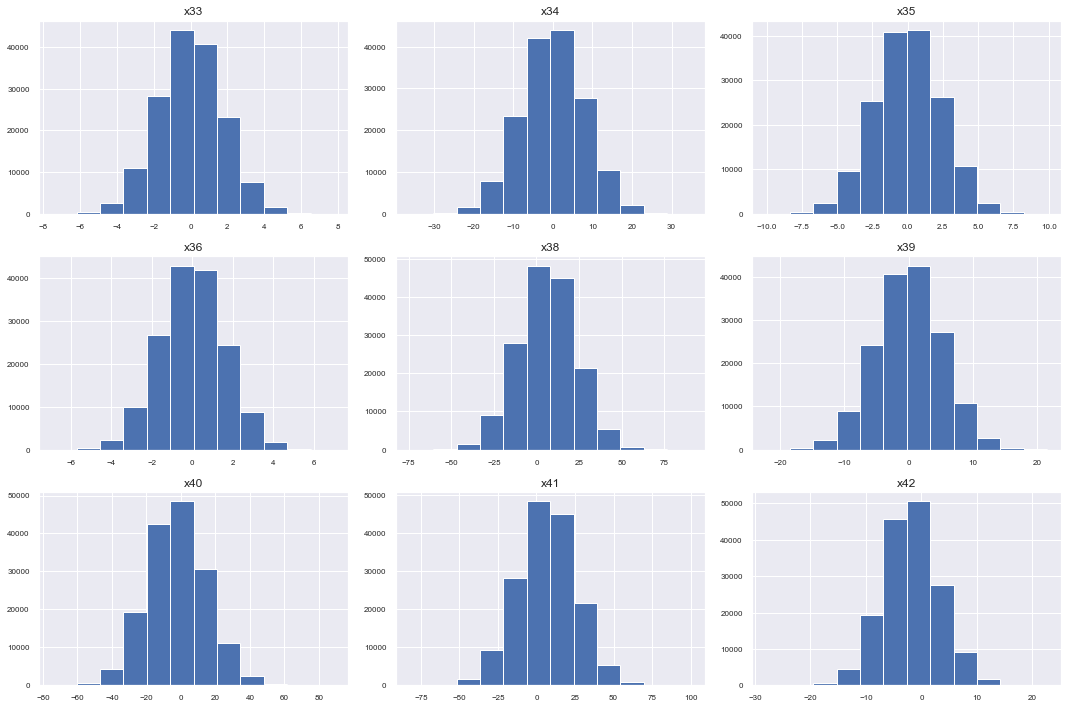

In [281]:
df4.hist(xlabelsize = 8, ylabelsize = 8, bins = 12, figsize = (15, 10))
plt.tight_layout()
plt.show()

In [296]:
# df1 = df.dropna(subset=['x24', 'x29','x30'])
# print("Total Missing Values: ", df.isnull().sum().sum()) 

Total Missing Values:  1520
